In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

data_path = Path().cwd() / 'data'
data_path

WindowsPath('c:/Users/ethan/Documents/GitHub/ds-ciss-predicting-dig-sites/analysis/data')

In [2]:
df = pd.read_parquet(data_path / 'mass_test.parquet', engine='pyarrow', dtype_backend='pyarrow')
df.drop(columns=['Is_Site', 'prediction'], inplace=True)


display(df.dtypes.to_frame().T)

df['Wetness'] = df['Wetness'].astype('uint8[pyarrow]')
df['Slope'] = df['Slope'].astype('uint8[pyarrow]')

display(df.dtypes.to_frame().T)

display(df.head())

display(df.shape)

df.memory_usage(deep=True).sum() / 1e9

,Elevation,Wetness,Temp,Slope,NEAR_DIST_Chert,NEAR_DIST_Canals,NEAR_DIST_River_Net,NEAR_DIST_Coastal,OBJECTID,x,y
0,double[pyarrow],int64[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow]


,Elevation,Wetness,Temp,Slope,NEAR_DIST_Chert,NEAR_DIST_Canals,NEAR_DIST_River_Net,NEAR_DIST_Coastal,OBJECTID,x,y
0,double[pyarrow],uint8[pyarrow],double[pyarrow],uint8[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow]


,Elevation,Wetness,Temp,Slope,NEAR_DIST_Chert,NEAR_DIST_Canals,NEAR_DIST_River_Net,NEAR_DIST_Coastal,OBJECTID,x,y
0,70.596275,0,16.799999,207,27245.870159,325051.049972,92375.044496,109.719805,3353,15.726739,43.02339
1,41.27142,0,17.1,236,24605.088261,327292.421342,90111.311563,128.050137,3362,15.759382,43.02339
2,58.482124,0,16.5,232,24494.10294,326739.480379,89566.947218,238.350808,3410,15.759382,43.032675
3,22.511099,0,17.0,242,792.107078,376552.349498,77429.587911,45.335448,183,16.510161,42.763406
4,49.590641,0,16.6,208,243.292773,375700.235383,76428.133607,123.823975,184,16.510161,42.772691


(3293777, 11)

np.float64(0.248268579)

In [24]:
gdf = pd.read_parquet(data_path / 'mass_test_grouped.parquet', engine='pyarrow', dtype_backend='pyarrow')
gdf.drop(columns=['Is_Site', 'prediction'], inplace=True)

gdf['Wetness'] = gdf['Wetness'].astype('uint8[pyarrow]')
gdf['Slope'] = gdf['Slope'].astype('uint8[pyarrow]')

gdf.sort_values(by=['count'], ascending=False, inplace=True)

gdf.to_csv(data_path / 'mass_test_grouped.csv', index=False) # save to csv for ArcGIS

gdf.head(20)

,Elevation,Wetness,Temp,Slope,NEAR_DIST_Chert,NEAR_DIST_Canals,NEAR_DIST_River_Net,NEAR_DIST_Coastal,OBJECTID,x,y,count
93,6.096866,0,17.1,250,7438.122917,354876.011326,60441.294925,52.522538,4166,16.183735,43.051245,4743.0
28,18.032301,0,17.0,239,2679.504352,361949.273163,72232.767424,69.192262,771,16.820265,42.772691,4727.0
102,18.420116,0,17.200001,249,5375.541569,353873.798887,58973.863976,125.54557,4374,16.151092,43.0791,4726.0
24,94.752892,0,16.9,250,1585.539131,375801.908277,77122.515747,430.272441,662,16.526482,42.763406,4723.0
3,22.511099,0,17.0,242,792.107078,376552.349498,77429.587911,45.335448,183,16.510161,42.763406,4721.0
32,11.46465,0,17.1,250,9795.034784,351269.070028,60962.371511,32.147464,5155,16.787622,42.911968,4705.0
41,15.092567,0,17.1,247,1325.454971,349639.236937,53574.72733,76.727783,5300,16.706016,42.949108,4698.0
8,22.488901,0,17.0,249,8502.136424,346411.257789,76686.733605,73.660222,3868,16.004201,42.986249,4691.0
406,15.615183,0,16.9,250,47.348318,348891.879173,53526.04418,554.1963,5306,16.722337,42.949108,4677.0
9,10.113801,0,17.200001,247,7886.33417,347547.402456,75711.361409,69.925873,3874,16.020522,42.986249,4667.0


In [6]:
cutoff = 250

cutoff_sections = {
    f'{i - cutoff + 1} - {i}': gdf[(gdf['count'] < i) & (gdf['count'] >= i - cutoff + 1)].shape[0] for i in cutoff * np.arange(1, 5000 // cutoff + 1)
}

cutoff_sections

{'1 - 250': 1523,
 '251 - 500': 220,
 '501 - 750': 99,
 '751 - 1000': 57,
 '1001 - 1250': 45,
 '1251 - 1500': 54,
 '1501 - 1750': 106,
 '1751 - 2000': 89,
 '2001 - 2250': 83,
 '2251 - 2500': 95,
 '2501 - 2750': 98,
 '2751 - 3000': 83,
 '3001 - 3250': 67,
 '3251 - 3500': 51,
 '3501 - 3750': 50,
 '3751 - 4000': 46,
 '4001 - 4250': 81,
 '4251 - 4500': 77,
 '4501 - 4750': 54,
 '4751 - 5000': 0}

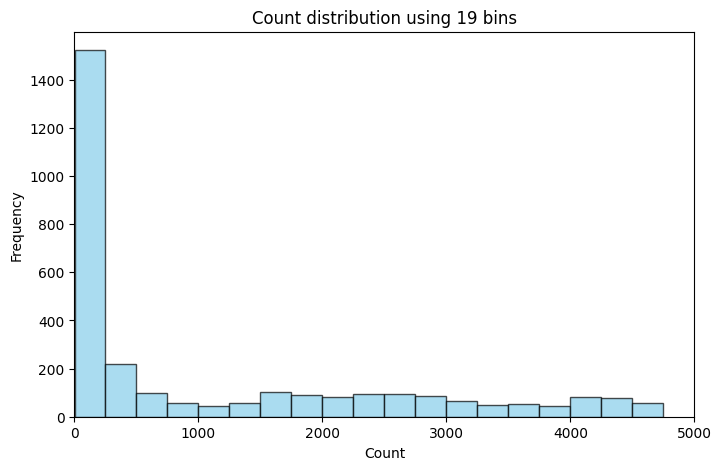

In [23]:
plt.figure(figsize=(8, 5))

plt.title(f'Count distribution using {5000//cutoff-1} bins')

plt.xlabel('Count')
plt.ylabel('Frequency')

plt.hist(gdf[gdf['count'] >= 0]['count'], bins=5000//cutoff-1, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlim(0, 5000)

plt.show()